In [2]:
!pip install matplotlib seaborn wordcloud

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.1 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.4 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.7 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [seaborn]m8/9 [seaborn]ib]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

In [12]:
df.set_index('Country', inplace=True)

In [ ]:
df.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [16]:
years = list(map(str, range(1980, 2014)))

## WAFFLE CHARTS
A waffle chart is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

Let's revisit the previous case study about Denmark, Norway, and Sweden.

In [20]:
# Let's get Denmark, Norway, and Sweden data
df_dsn = df.loc[['Denmark', 'Norway', 'Sweden']]
df_dsn


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Unfortunately, unlike R, waffle charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

#### Step 1. 
The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [21]:
# Compute the proportion of each country with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

# Print out the proportions
pd.DataFrame({"Category Proportions": category_proportions})

,Category Proportions
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


#### Step 2. 
The second step is defining the overall size of the waffle chart.

In [22]:
width = 40  # Width of the waffle chart
height = 10  # Height of the waffle chart

total_num_tiles =  width * height  # Total number of tiles in the waffle chart

print(f"Total number of tiles: {total_num_tiles}")

Total number of tiles: 400


#### Step 3. 
The third step is using the proportion of each category to determe it respective number of tiles

In [23]:
# Compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# Print out the number of tiles for each category
pd.DataFrame({"Tiles per Category": tiles_per_category})

,Tiles per Category
Country,
Denmark,129
Norway,77
Sweden,194


#### Step 4. 
The fourth step is creating a matrix that resembles the waffle chart and populating it.

In [26]:
# Initialize Waffle Chart as an empty Matrix
waffle_chart = np.zeros((height, width), dtype=int)

# define indices to loop through the chart
category_index = 0
tile_index = 0

# Populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1
            
        # set the value to an integer, which increases with class
        waffle_chart[row, col] = category_index

waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

#### Step 5. 
Map the waffle chart matrix into a visual.

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_19609/564807462.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_19609/564807462.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_19609/564807462.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

<Figure size 640x480 with 0 Axes>

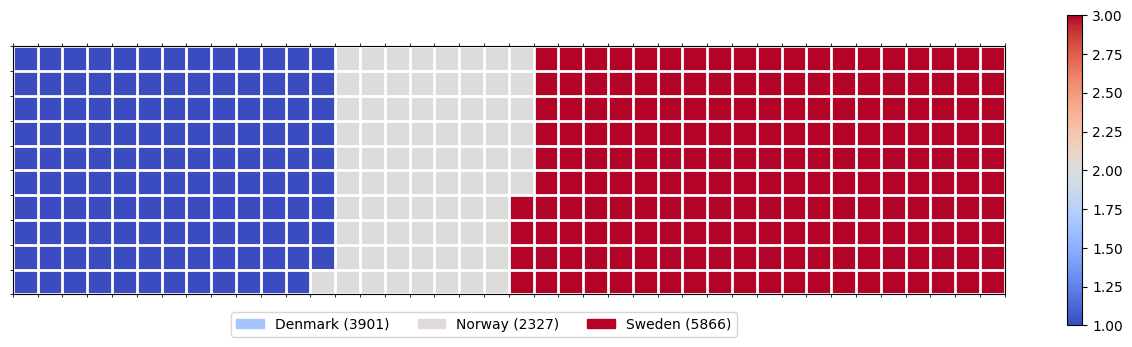

In [31]:
import matplotlib.patches as mpatches

# Create new figure
fig = plt.figure()

# Use matshow to visualize the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# Get the axes
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
)
plt.show()

#### CREATE WAFFLE CHARTS FUNCTION
Now it would very inefficient to repeat these seven steps every time we wish to create a waffle chart. So let's combine all seven steps into one function called create_waffle_chart. This function would take the following parameters as input:

- categories: Unique categories or classes in dataframe.
- values: Values corresponding to categories or classes.
- height: Defined height of waffle chart.
- width: Defined width of waffle chart.
- colormap: Colormap class
- value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.

In [36]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    # Compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    # Compute the total number of tiles in the waffle chart
    total_num_tiles = width * height
    print ('Total number of tiles is:', total_num_tiles)
    
    # Compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ': ' + str(tiles))
        
    # Initialize Waffle Chart as an empty Matrix
    waffle_chart = np.zeros((height, width), dtype=int)
    
    # define indices to loop through the chart
    category_index = 0
    tile_index = 0
    
    # Populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1
            
            # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1
                
            # set the value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # Create new figure
    fig = plt.figure()
    
    # Use matshow to visualize the waffle chart
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()
    
    # Get the axes 
    ax = plt.gca()
    
    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i]) / total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
        
    # add legend to chart
    plt.legend(handles=legend_handles,
               loc='lower center',
               ncol=len(categories),
               bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()               

#### Call the function

In [37]:
width = 40 # Width of the waffle chart
height = 10 # Height of the waffle chart

categories = df_dsn.index.values # Categories
values = df_dsn['Total'].values # Values corresponding to categories

colormap = plt.cm.coolwarm # Colormap class

Total number of tiles is: 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

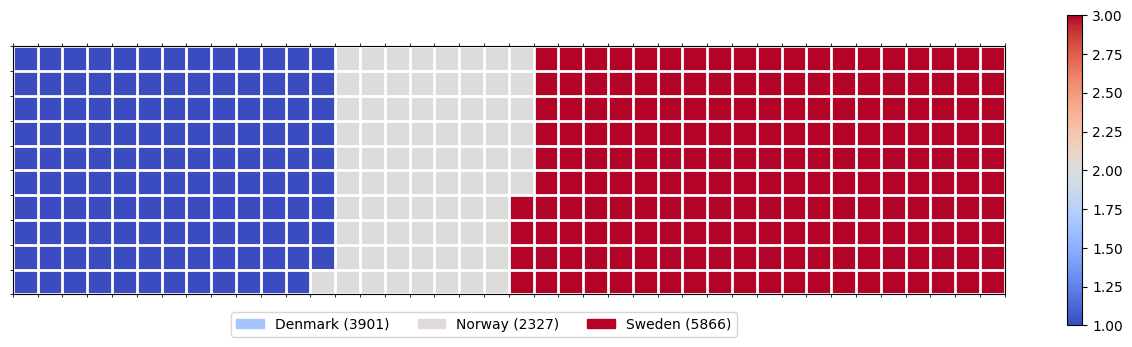

In [38]:
create_waffle_chart(categories, values, height, width, colormap)

## PYWAFFLE
a new Python package for generating waffle charts called PyWaffle,

In [39]:
# Install pywaffle
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pywaffle]mefree]


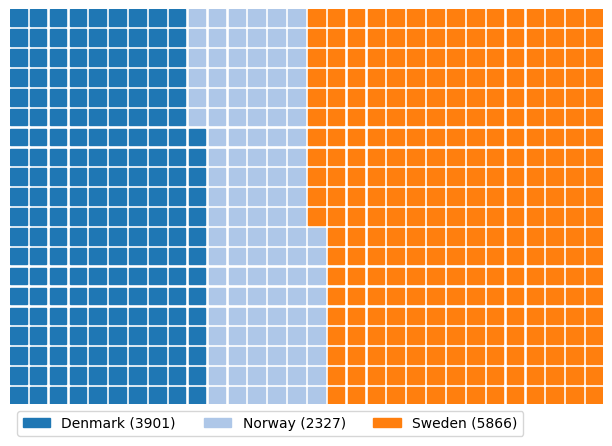

In [44]:
# import waffle from pywaffle
from pywaffle import Waffle

# Set up the Waffle chart figure
fig = plt.figure(FigureClass=Waffle, 
                 rows=20,
                 columns=30,
                 values=df_dsn['Total'],
                 cmap_name= 'tab20',
                 legend= {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3})
plt.show()

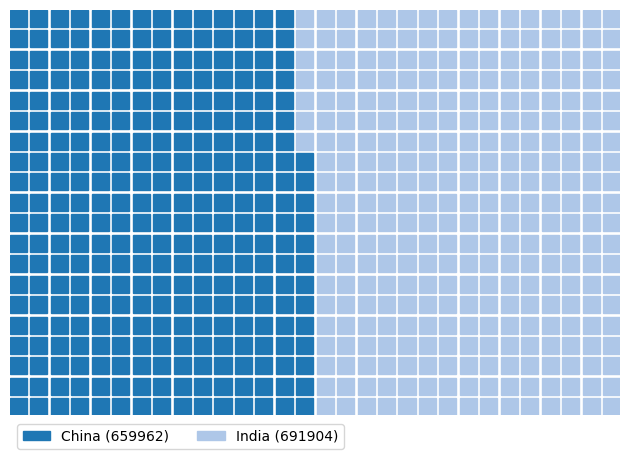

In [54]:
# Let's try with China and India
df_CI = df.loc[['China', 'India']]

# Create figure
fig = plt.figure(FigureClass=Waffle,
                 rows=20,
                 columns=30,
                 values=df_CI['Total'],
                 cmap_name='tab20',
                 legend={'labels': [f"{k} ({v})" for k, v in zip(df_CI.index.values, df_CI.Total)],
                         'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 2})
plt.show()

## WORD CLOUDS
Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [56]:
# Import packages and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

Word clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by __Lewis Carroll__ titled Alice's Adventures in Wonderland. Let's go ahead and download a .txt file of the novel.

In [57]:
import urllib

# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Next, let's use the stopwords that we imported from <code>word_cloud</code>. We use the function set to remove any redundant stopwords.

In [58]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.



In [59]:
# Create a word cloud object
alice_wc = WordCloud()

# Generate the word cloud using the novel text
alice_wc.generate(alice_novel)

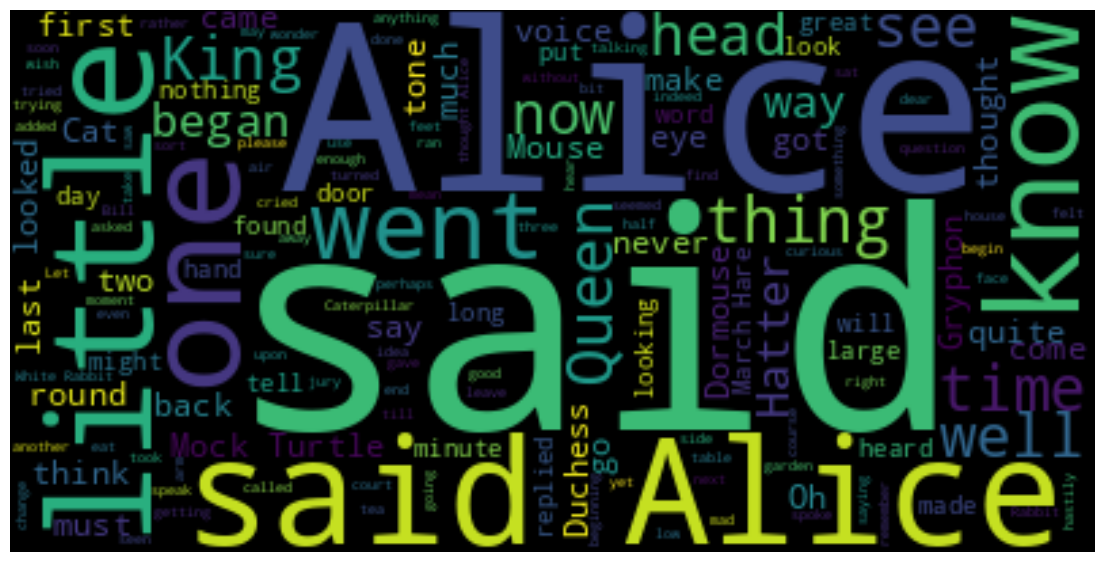

In [62]:
fig = plt.figure(figsize=(14,18))

# Display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.


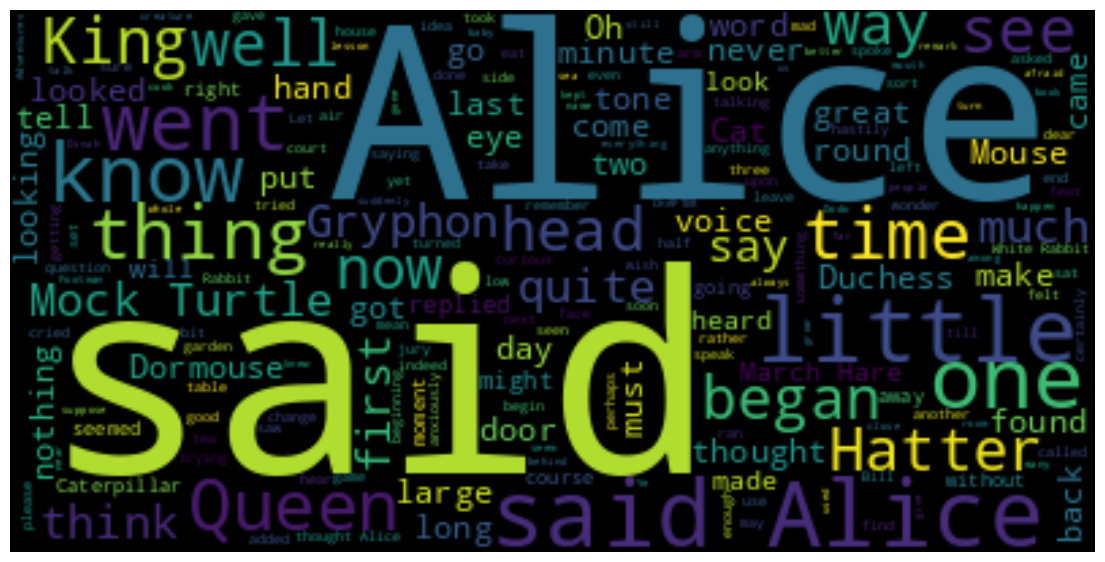

In [64]:
stopwords.add("said")  # Adding a custom stopword

# re-generate the word cloud
alice_wc.generate(alice_novel)

# Create the figure
fig = plt.figure(figsize=(14,18))

# Display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Let's use masking

In [67]:
from PIL import Image

#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

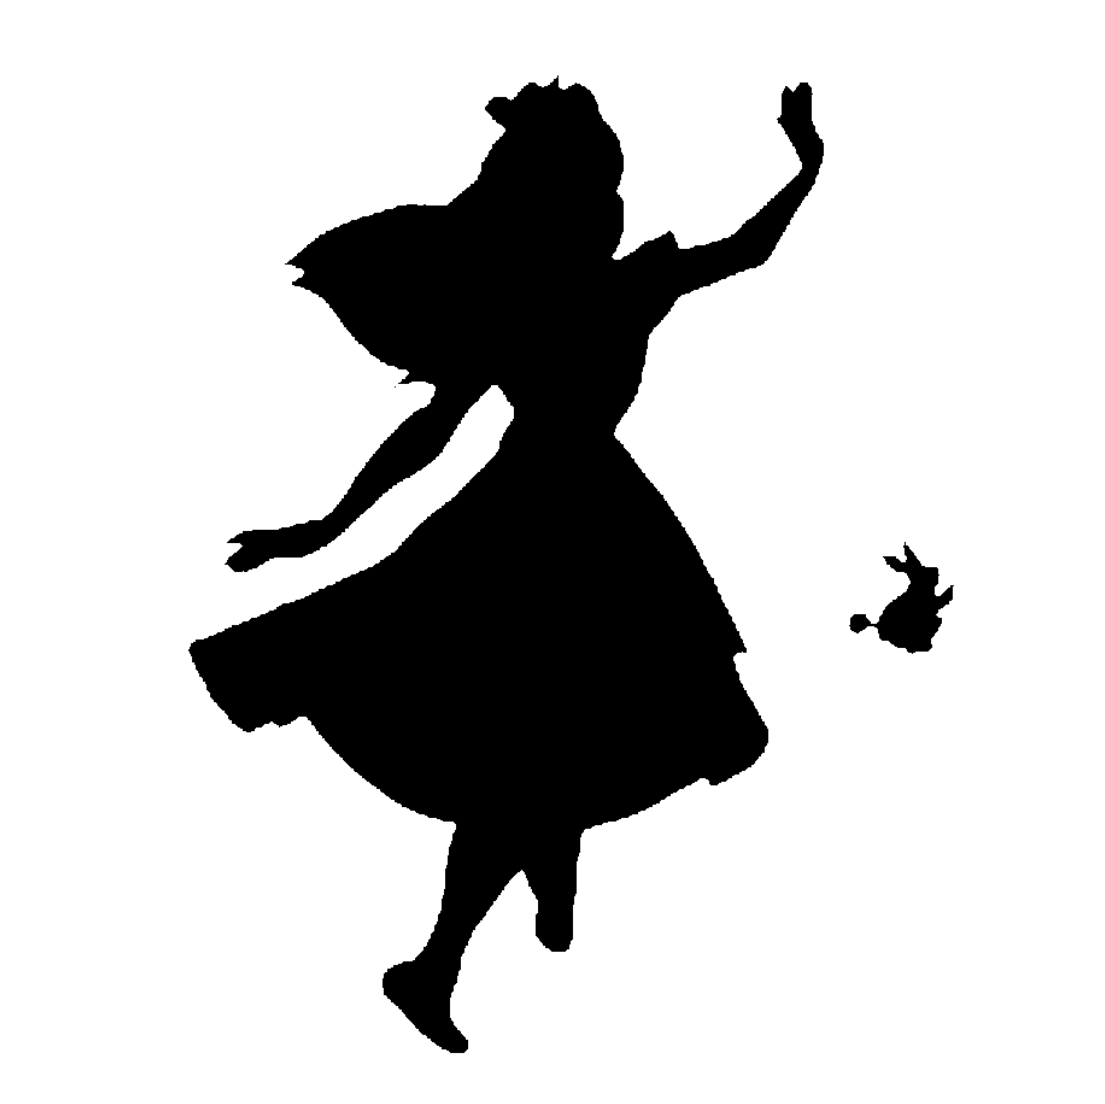

In [68]:
fig = plt.figure(figsize=(14,18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()  

Shaping the <code>word_cloud</code> according to the mask is straightforward using <code>word_cloud</code> package. For simplicity, we will continue using the first 2000 words in the novel.

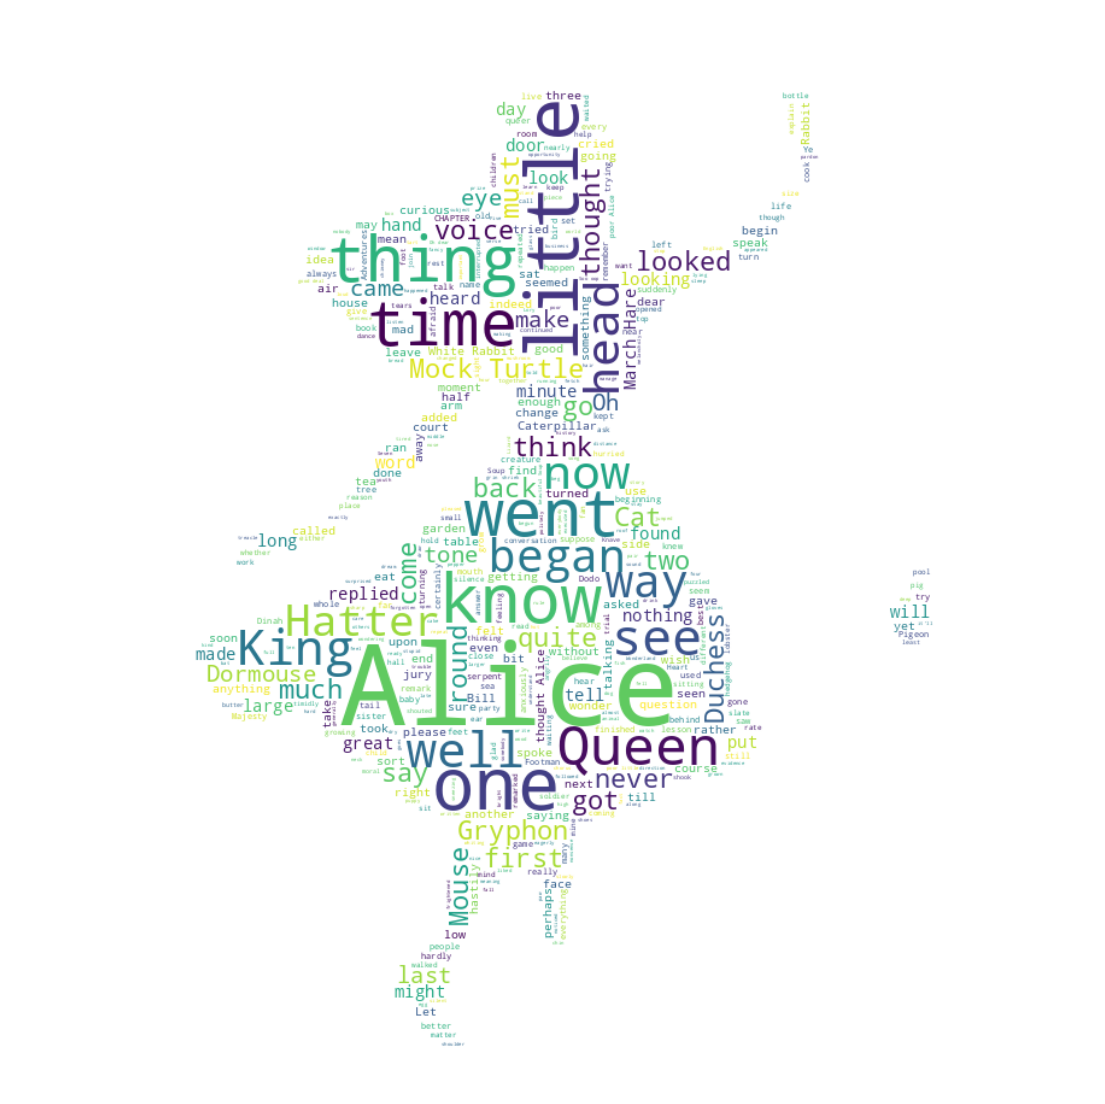

In [70]:
# Create a word cloud object
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     mask=alice_mask,
                     stopwords=stopwords,)

# Generate the word cloud using the novel text
alice_wc.generate(alice_novel)

# Create the figure
fig = plt.figure(figsize=(14,18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [71]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [75]:
total_immigration = df['Total'].sum()

max_words = 90
word_string = ''
for country in df.index.values:
    # Check if country name is a single word
    if country.count(' ') == 0:
        repeat_num_times = int(df.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
# Display the generated text
word_string
        # Add the country name to the string as many times as it contributes to

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

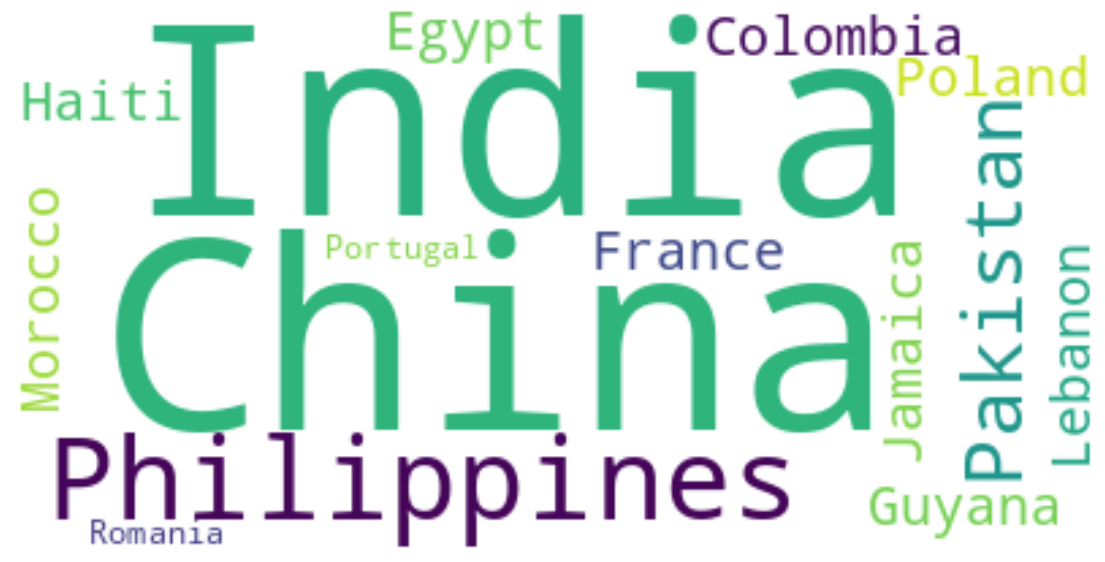

In [76]:
# create the word cloud
word_cloud = WordCloud(background_color='white').generate(word_string)

# Create the figure
fig = plt.figure(figsize=(14,18))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## PLOTTING with SEABORN
Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

#### CATEGORICAL PLOTS

In [77]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

#### COUNTPLOT
__A count plot can be thought as a histogram across a categorical, instead of quantitative, variable__. Let's find the count of Continents in the data <code>df</code> using countplot on __'Continent'__.

<Axes: xlabel='Continent', ylabel='count'>

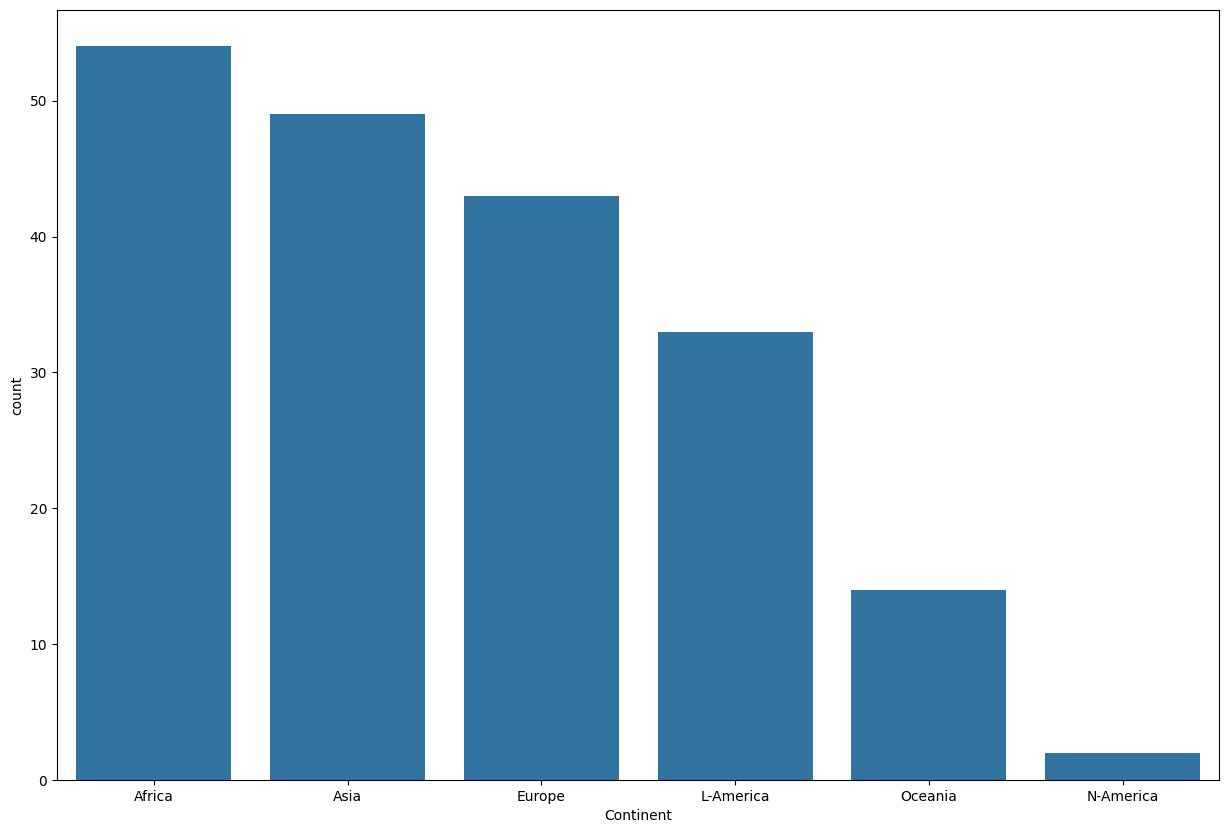

In [83]:
# Shorten continent names for better visualization
df_continent = df.replace('Latin America and the Caribbean', 'L-America')
df_continent = df_continent.replace('Northern America', 'N-America')

# Create a count plot for the 'Continent' column
plt.figure(figsize=(15, 10))
sns.countplot(data=df_continent, x='Continent', order=df_continent['Continent'].value_counts().index)

#### BARPLOT
__This plot will perform the Groupby on a categorical variable and plot aggregated values, with confidence intervals.__

Let's plot the total immigrants Continent-wise.

<Axes: xlabel='Continent', ylabel='Total'>

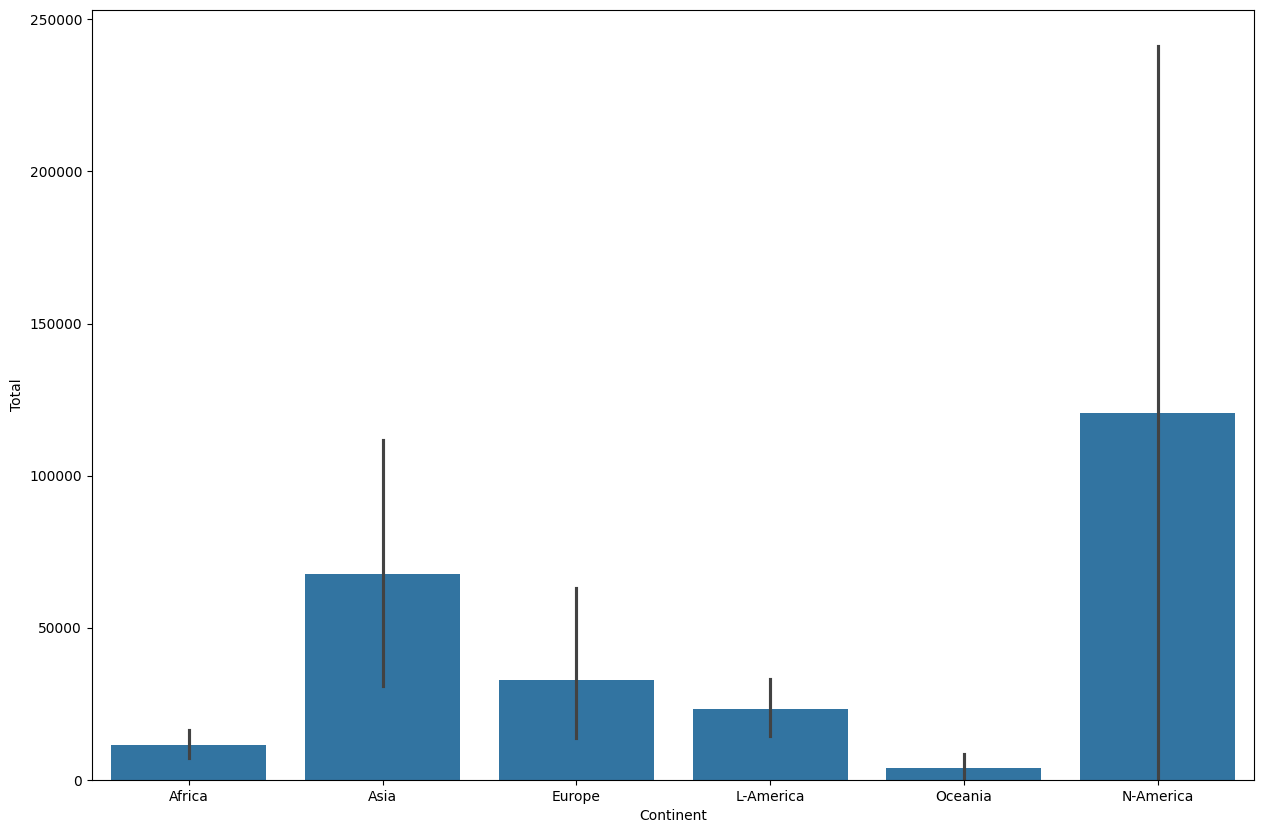

In [84]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_continent, x='Continent', y='Total', order=df_continent['Continent'].value_counts().index)

Let's verify the value by performing the __groupby__ on the __Total__ and __Continent__ for <code>mean()</code>

In [85]:
df_continent2 = df_continent.groupby('Continent')['Total'].mean()
df_continent2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

## REGRESSION PLOT
With __Seaborn__, generating a regression plot is simple as calling the __regplot__ function.

In [86]:
years = list(map(str, range(1980, 2014)))

# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df[years].sum(axis=0))

# Change the years to type float (useful for regression later on)
df_total.index = df_total.index.astype(float)

# Reset the index to put in back in as a column in the df_total DataFrame
df_total.reset_index(inplace=True)

# Rename columns
df_total.columns = ['Year', 'Total']

# View the final DataFrame
df_total.head()

,Year,Total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


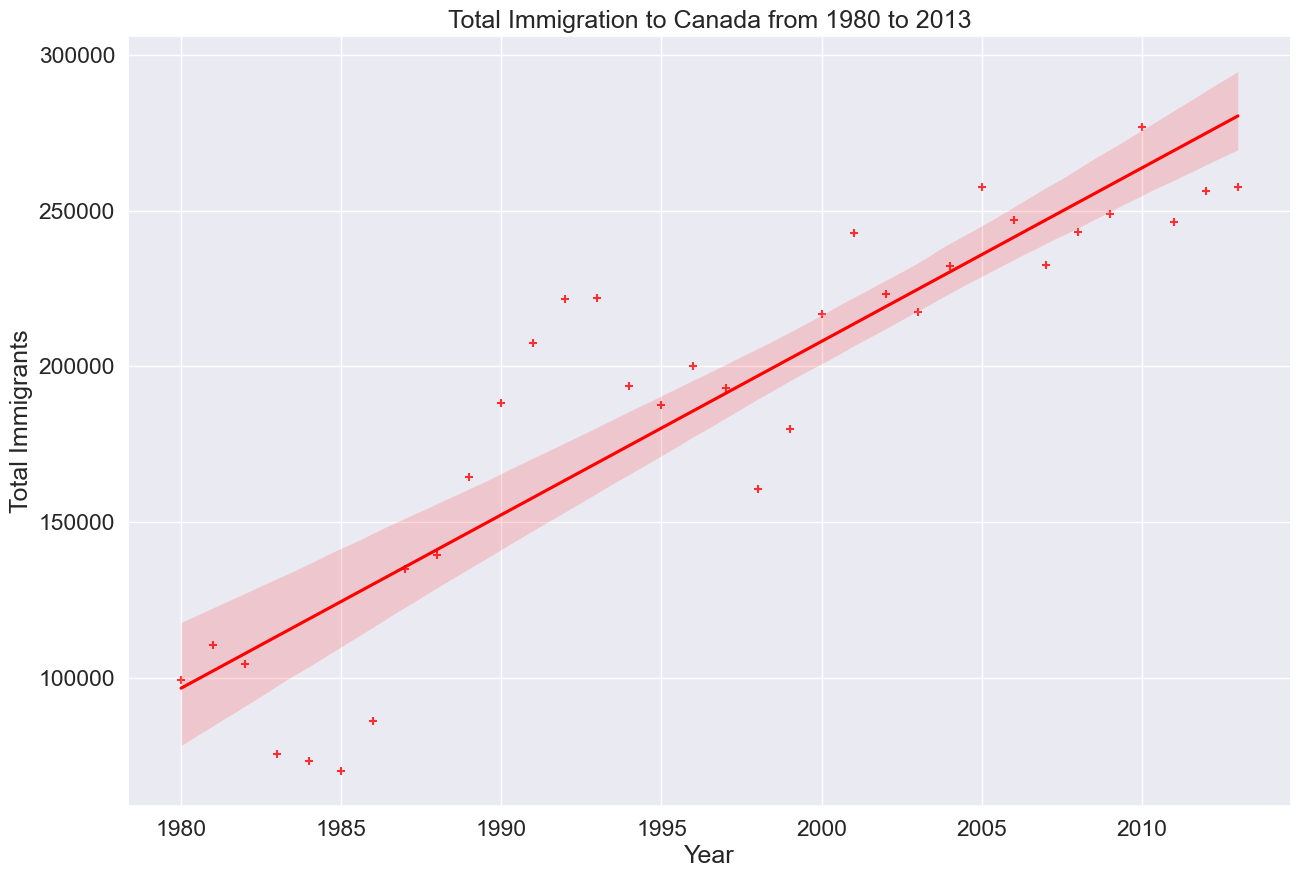

In [114]:
# Seaborn's regplot function can be used to plot a regression line
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)  # Set font scale for better readability
sns.set_style('darkgrid')  # Set style for the plot

ax = sns.regplot(data=df_total, x='Year', y='Total', color='red', marker='+')

ax.set(xlabel='Year', ylabel='Total Immigrants') # add x and y labels
ax.set_title('Total Immigration to Canada from 1980 to 2013') # add title

plt.show()

Let's try with ___Denmark, Sweden, and Norway___

In [ ]:
# Create df_dsn dataframe
df_dsn = df.loc[['Denmark', 'Sweden', 'Norway'], years].T

# Create new_df by summing across three countries for each years
df_dsn_tot = pd.DataFrame(df_dsn.sum(axis=1))

# Reset index in place
df_dsn_tot.reset_index(inplace=True)

# Rename columns
df_dsn_tot.columns = ['Year', 'Total']

# Change column year from string to int to create scatter plot
df_dsn_tot['Year'] = df_dsn_tot['Year'].astype(int)

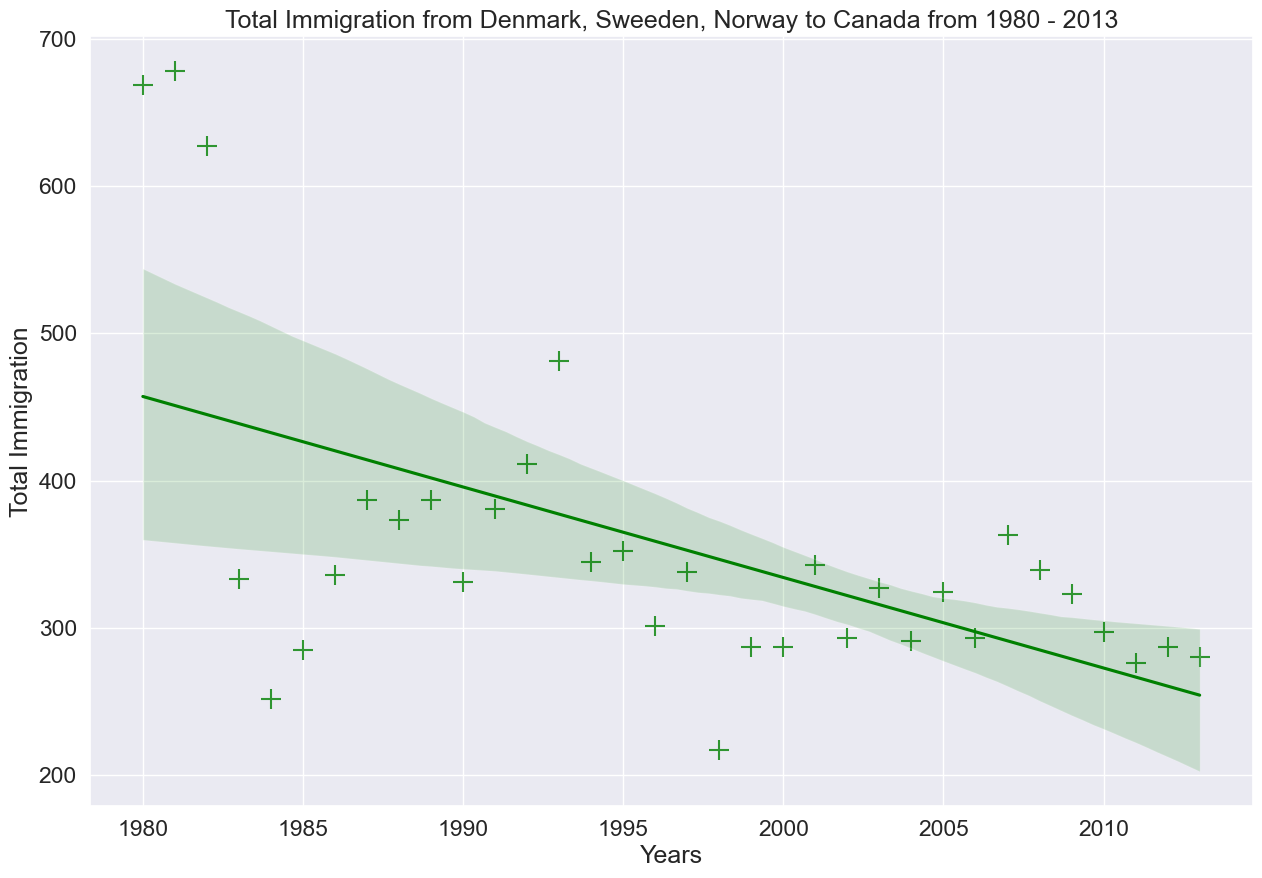

In [135]:
# Create figure
plt.figure(figsize=(15,10))

# Define background style and font size
sns.set(font_scale=1.5)

# Generate plot and add title and axes labels
ax = sns.regplot(x='Year', y='Total', data=df_dsn_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Years', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweeden, Norway to Canada from 1980 - 2013')

plt.show()